In [2]:
# !pip install turingquant
# !pip install scipy
# !pip install seaborn

In [34]:
from turingquant.metrics import returns
from turingquant.metrics import cumulative_returns
from turingquant.metrics import cagr
from turingquant.metrics import mar_ratio
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lista de Funções para Estudar

* [returns]()
* cumulative_returns 
* [cagr](https://www.suno.com.br/artigos/cagr/) 
* [mar_ratio](https://www.investopedia.com/terms/m/mar-ratio.asp)

Para cada uma das funções:
1. Estudar conceitos por trás
2. Testar função com dados da Yahoo Finance
3. Explicar resultados e fórmulas utilizadas

In [40]:
df = yf.download(["ITUB3.SA","PETR3.SA"], start='2015-01-01', end='2023-01-01')
df2 = yf.download(["ITUB3.SA"], start='2015-01-01', end='2023-01-01')

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
df.head()

Adj Close                Close                High           \
             ITUB3.SA  PETR3.SA   ITUB3.SA PETR3.SA   ITUB3.SA PETR3.SA   
Date                                                                      
2015-01-02  11.216160  3.803155  17.079889     9.00  17.426996     9.67   
2015-01-05  11.089528  3.494677  16.887053     8.27  17.129477     8.96   
2015-01-06  11.198068  3.405936  17.052341     8.06  17.267218     8.53   
2015-01-07  11.451339  3.570739  17.438017     8.45  17.900826     8.51   
2015-01-08  11.614155  3.811606  17.685949     9.02  17.895315     9.26   

                  Low                Open            Volume            
             ITUB3.SA PETR3.SA   ITUB3.SA PETR3.SA ITUB3.SA  PETR3.SA  
Date                                                                   
2015-01-02  16.776859     9.00  17.421488     9.58   220704  12710900  
2015-01-05  16.468319     8.25  16.782370     8.64   396214  25730600  
2015-01-06  16.870523     7.78  16.887053     8.28   558112  29754600  
2015-01-07  17.355371     8.08  17.382919     8.30   696234  34128300  
2015-01-08  17.316805     8.52  17.592285     8.60   267894  37487300

## Função _returns_

Calcula a variação percentual de um ativo, dia a dia. Abaixo, exemplos de sua utilização.

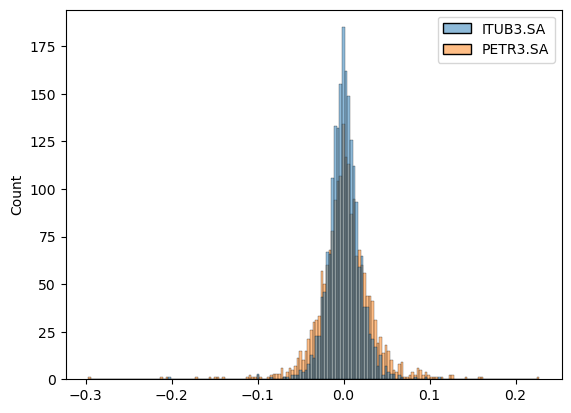

In [16]:
# get just the adjusted close price of days 01/01/2020 and 01/01/2022
data = returns(df['Adj Close'].loc['2015-01-01':'2023-01-01'])
sns.histplot(data);

- seria mais interessante automatizar

### Comparar este histograma com periodos mais curtos ou periodos onde a acao tenha ido melhor

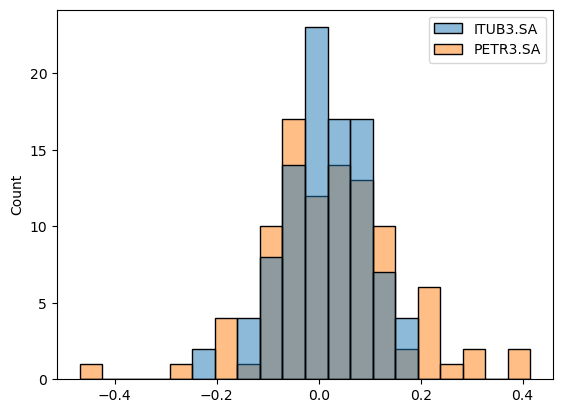

In [19]:
# group returns by month: histograma de retornos mensais do ativo
monthly_data2 = returns(df['Adj Close'].loc['2015-01-01':'2023-01-01']).groupby(pd.Grouper(freq='M')).sum()
sns.histplot(monthly_data2);

## Função _cumulative\_returns_

**Representa o retorno cumulativo de determinado ativo (ou portfolio) em um dado período.** <br><br>

O retorno cumulativo é bastante útil para avaliar o desempenho geral de um investimento no horizonte de tempo determinado, sendo possível observar também as flutuações na cotação desse ativo ou portfolio<br><br>

Sua fórmula é dada por: 
$Ret_{acum} = (1 + Ret_{t_{1}}) * (1 + Ret_{t_{2}}) * ... * (1 + Ret_{t_{n}})$





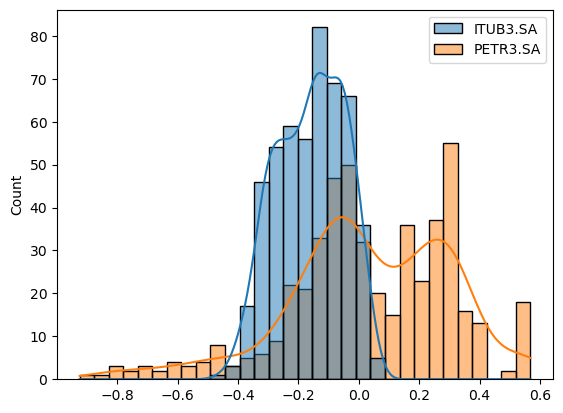

In [22]:
# retorno logaritmico
data_log = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'log')   
sns.histplot(data_log, 
             color = "darkorange",
             kde = True);

In [26]:
data_log['ITUB3.SA']

Date
2020-01-02         NaN
2020-01-03   -0.008282
2020-01-06   -0.018489
2020-01-07   -0.037865
2020-01-08   -0.048062
                ...   
2021-12-23   -0.311456
2021-12-27   -0.302115
2021-12-28   -0.305714
2021-12-29   -0.308810
2021-12-30   -0.320715
Name: ITUB3.SA, Length: 495, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


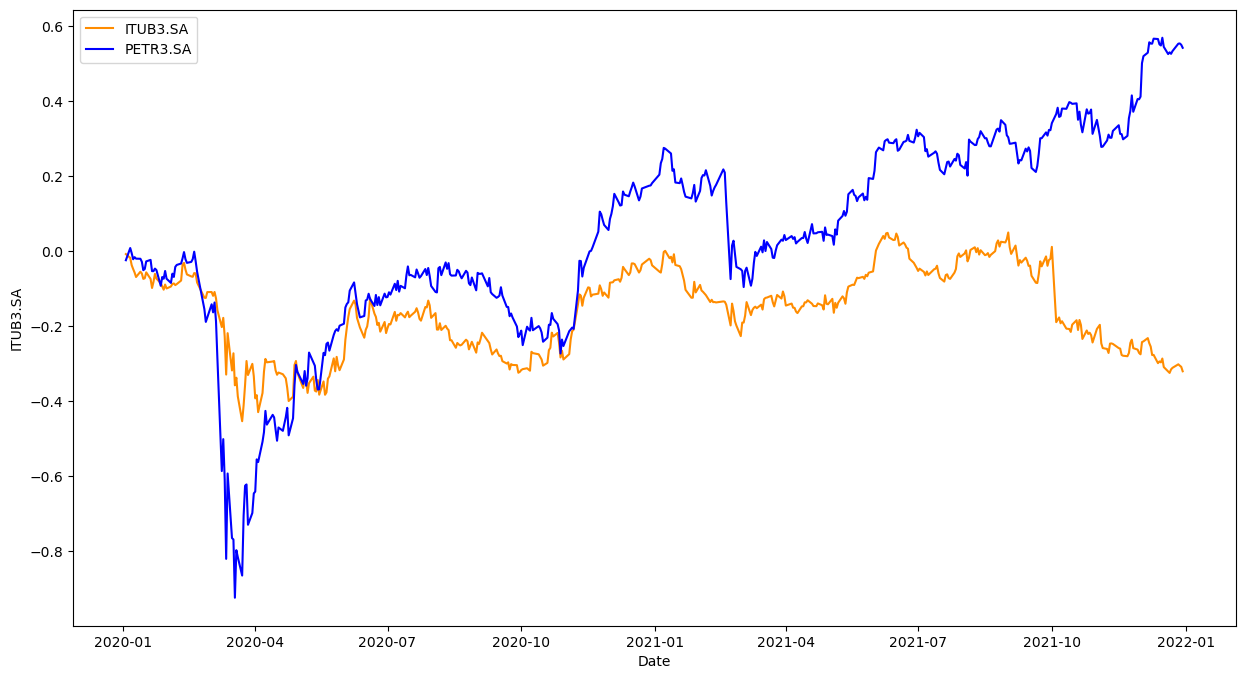

In [37]:
# line plot fica mais simples de visualizar
sns.lineplot(data_log.index, data_log['ITUB3.SA'], color = "darkorange");
sns.lineplot(data_log.index, data_log['PETR3.SA'], color = "blue");
plt.legend(labels=['ITUB3.SA', 'PETR3.SA']);
plt.gcf().set_size_inches(15, 8);

e o retorno somado, a evoluca

tem dois tipos:
- na pratica talvez seja mais usado o simples
- o log pode ajudar em alguns

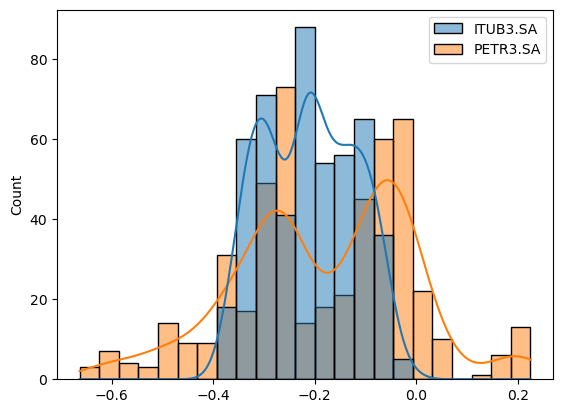

In [38]:
# retorno simples 
data_simp = cumulative_returns(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), 'simp')   
sns.histplot(data_simp, 
             color = "darkblue",
             kde = True);

log retorno pode ser interessante, e a soma dos retornos: quando tem uma queda para voltar para o mesmo patamar e o mesmo valor

## Função _cagr_

**CAGR é a sigla para Compound Annual Growth Rate, ou seja, Taxa de Crescimento Anual Composta** <br><br>

Geralmente apresentada em termos percentuais, nada mais é do que a taxa de crescimento anual que, se aplicada de forma constante ao longo do período considerado, resultaria no crescimento total observado na cotação de um ativo (ou portfolio). É bastante útil para comparar a performance de investimentos em diferentes horizontes de tempo, pois utiliza a mesma base de tempo (anual). Cabe ressaltar que o CAGR não mostra explicitamente a variação existente na cotação (o quanto flutuou o preço do ativo). Um CAGR de 10%, por exemplo, pode "esconder" momentos de retornos negativos e momentos de retorno muito positivos

In [46]:
# CAGR anual - time_scale de 252 dias
# 2020 a 2022
cagr_anual_20_21 = cagr(returns(df2['Adj Close'].loc['2020-01-01':'2022-01-01']), time_scale = 252)
print(cagr_anual_20_21)

-0.2123968002411667


In [49]:
# CAGR anual - time_scale de 252 dias
# 2018 a 2020
cagr_anual_21_22 = cagr(returns(df2['Adj Close'].loc['2018-01-01':'2020-01-01']), time_scale = 252)
print(cagr_anual_21_22)

0.19421380625883722


se o ativo oscilasse um valor fixo: 

- cagr vai ser a porcentagem media q o investimento rendeu por ano
- quando roda um backtesting cagr e uma metrica interessante de se analizar

### Um grafico melhoraria a explicacao desta metrica ???

### Seria interessante comparar esta metrica aplicada em algum outro ativo e fazer alguma comparacao ???

## Função _mar\_ratio_

**MAR Ratio é a sigla para Minimum Acceptable Return Ratio, ou seja, Taxa de Retorno Mínimo Aceitável** <br><br>

O seu cálculo leva em consideração duas coisas: 1) CAGR (explicado acima) e 2) Drawdown <br>
O Drawdown representa o quanto a cotação de um ativo (ou portfolio) caiu do o seu pico anteriormente alcançado até seu vale subsequente. O Máximo Drawdown representa a maior queda (em termos percentuais) de um pico até seu vale subsequente, mostrando o impacto negativo que um investidor teria tido se tivesse comprado o ativo no pior pico possível e vendido no ponto mais baixo do Drawdown. <br><br>

Finalmente, o MAR ratio pode ser expresso pela razão entre o CAGR e o Máximo Drawdown observados no período. É, portanto, uma medida de avaliação da relação risco-retorno, funcionando como uma métrica para ajustar o retorno de um investimento ao risco a que ele está exposto (tomando como base seu desempenho histórico).

In [41]:
# MAR Ratio para 2 anos (2020 - 2022)
# time_window = 2; time_scale = 252

marratio_20_22 = mar_ratio(returns(df['Adj Close'].loc['2020-01-01':'2022-01-01']), time_window = 2, time_scale = 252)
print(marratio_20_22)

-0.004302659016234036


In [42]:
# MAR Ratio para 1 ano (2020 - 2021)
# time_window = 1; time_scale = 252

marratio_20_21 = mar_ratio(returns(df['Adj Close'].loc['2020-01-01':'2021-01-01']), time_window = 1, time_scale = 252)
print(marratio_20_21)

-0.0010287887929512508


In [43]:
# MAR Ratio para 1 ano (2021 - 2022)
# time_window = 1; time_scale = 252

marratio_21_22 = mar_ratio(returns(df['Adj Close'].loc['2021-01-01':'2022-01-01']), time_window = 1, time_scale = 252)
print(marratio_21_22)

-0.00801542557792216


- o maximo de retorno q estamos tendo considerando o risco

mar ratio ja usa o cagr:

- comparar o mar ratio () de 2 acoes e do drawdown e do preco do ativo: automatizar !!!!

- acrescentar garman class

- graficos garman class, preco e drawdown

- input: janela de tempo, codigos dos ativos

# Como essas funções podem ser utilizadas para montar um portfolio de investimento?